Shape of A: (506, 14)
Shape of b: (506,)
Shape of x: (14,)

Regression Coefficients:
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]


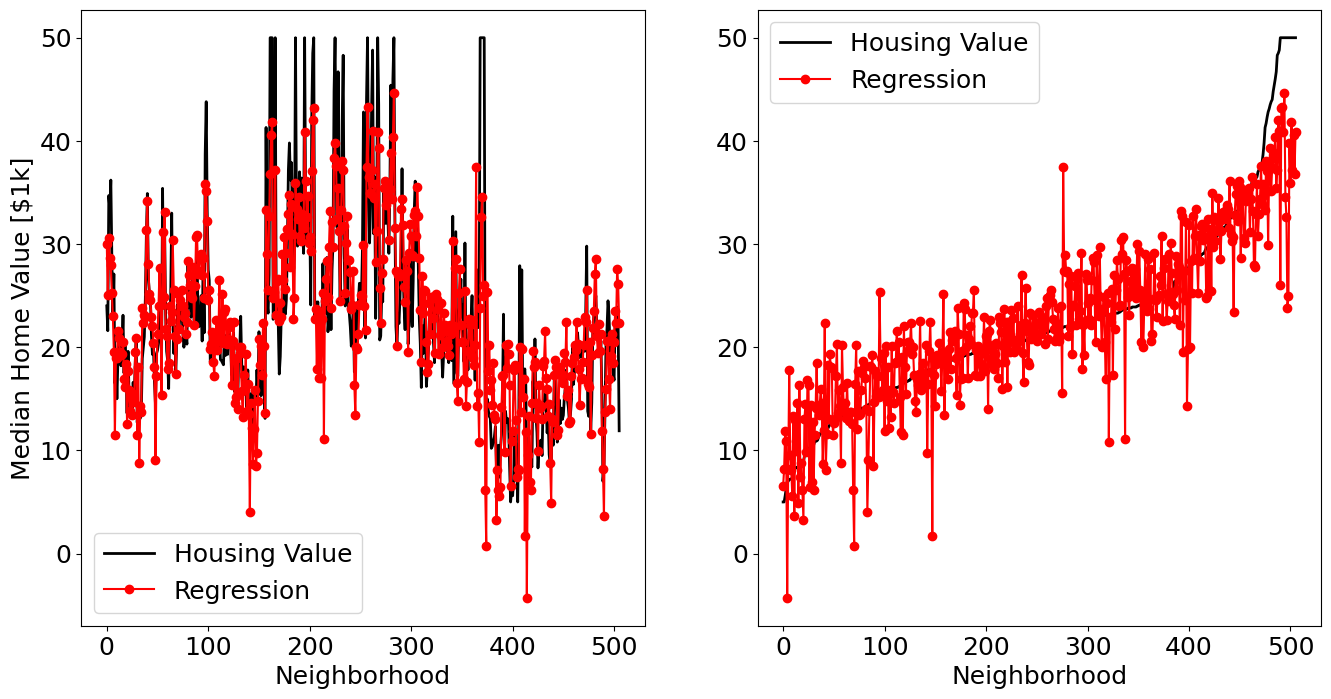

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt(os.path.join('.','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
# (0,0) means no padding on first dimension
# (0,1) means pad one column of ones on the right side of second dimension
# Without padding, the model is: b = x₁×feature₁ + x₂×feature₂ + ... + x₁₃×feature₁₃
# With padding, the model becomes: b = x₁×feature₁ + x₂×feature₂ + ... + x₁₃×feature₁₃ + x₁₄×1
# the last term x₁₄×1 is the bias/intercept term and providess a housing price when all features are zero.
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

print("Shape of A:", A.shape)
print("Shape of b:", b.shape)
print("Shape of x:", x.shape)

print("\nRegression Coefficients:\n", x)

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()